In [3]:
# biblioteki
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import numpy as np

In [4]:
images_folder_path = '/Users/milenabiernacka/Desktop/praca-magisterska/DF/DF20M'
data = pd.read_csv('/Users/milenabiernacka/Desktop/praca-magisterska/Mushroom-classification/merged_data.csv')
data.head()

,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,level2Name,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path,poisonous
0,2862684394,2020-09-17T00:00:00,2020.0,9.0,17.0,DK,"Langesø, Morud",17215.0,Mycena crocata (Schrad.) P.Kumm.,Fungi,...,Nordfyns,2862684394-136762,dead wood (including bark),Uffe Nygaard,55.433810,10.200162,10.0,Unmanaged deciduous woodland,2862684394-136762.JPG,0
1,2238502117,2017-08-16T00:00:00,2017.0,8.0,16.0,DK,Virum,10057.0,Agaricus augustus Fr.,Fungi,...,Rudersdal,2238502117-320693,soil,Michael Hansen,55.800171,12.478571,5.0,garden,2238502117-320693.JPG,0
2,2818074328,2020-07-23T00:00:00,2020.0,7.0,23.0,DK,"Gribskov, Enghavehus",20027.0,Russula olivacea (Schaeff.) Fr.,Fungi,...,Hillerød,2818074328-59948,soil,Anna ploug,55.976322,12.293878,1.0,Mixed woodland (with coniferous and deciduous ...,2818074328-59948.JPG,0
3,2238560017,2018-09-09T00:00:00,2018.0,9.0,9.0,DK,Færgelunden,11069.0,Boletus edulis Bull.,Fungi,...,Frederikssund,2238560017-331396,soil,Henrik Dalgaard,55.840458,12.027228,15.0,Deciduous woodland,2238560017-331396.JPG,0
4,2237970493,2011-08-20T00:00:00,2011.0,8.0,20.0,DK,Tofte Skov,17278.0,Mycena pseudocorticola Kühner,Fungi,...,Aalborg,2237970493-5168,bark,David Boertmann,56.844840,10.192650,75.0,Forest bog,2237970493-5168.JPG,0


In [5]:
# Upewnij się, że kolumna 'image_path' jest w obu ramkach danych
data['full_image_path'] = data['image_path'].apply(lambda x: os.path.join(images_folder_path, x))

<Axes: xlabel='species'>

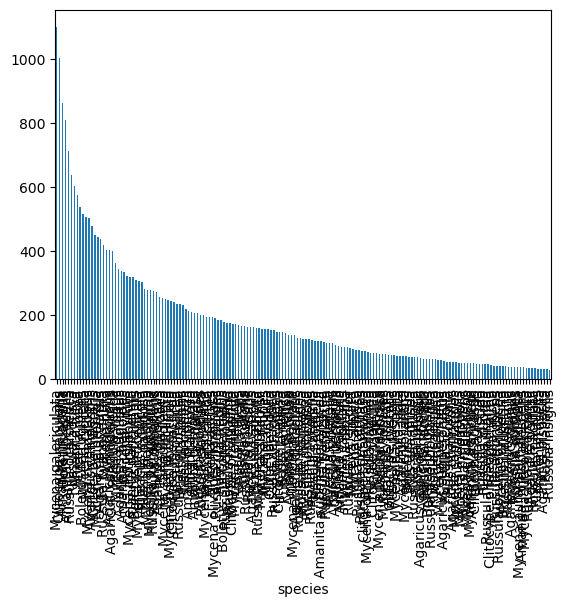

In [6]:
data['species'].value_counts().plot(kind='bar')

In [7]:
data['species'].value_counts()

species
Mycena galericulata    1099
Clitocybe nebularis    1003
Amanita muscaria        863
Boletus edulis          811
Amanita rubescens       713
                       ... 
Russula farinipes        33
Mycena rosella           33
Agaricus bisporus        33
Russula laeta            32
Russula insignis         28
Name: count, Length: 169, dtype: int64

In [8]:
sample = data.sample(frac=0.3)

In [9]:
sample.head()

,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path,poisonous,full_image_path
9977,2238218727,2013-08-24T00:00:00,2013.0,8.0,24.0,DK,Ødsted Skov,40854.0,Xerocomus ferrugineus (Schaeff.) Bon,Fungi,...,2238218727-308582,soil,Peter Lausted,55.675050,9.376450,100.0,Deciduous woodland,2238218727-308582.JPG,0,/Users/milenabiernacka/Desktop/praca-magisters...
7412,2449443119,2019-11-04T00:00:00,2019.0,11.0,4.0,GR,Agios Nikolaos Anapausas,10257.0,Amanita pantherina (DC.) Krombh.,Fungi,...,2449443119-124592,soil,Annette Greenfort,39.722900,21.620353,15.0,Unmanaged deciduous woodland,2449443119-124592.JPG,1,/Users/milenabiernacka/Desktop/praca-magisters...
16101,2238381586,2014-09-04T00:00:00,2014.0,9.0,4.0,DK,Biowide 071 Bjergfald,20056.0,Russula romellii Maire,Fungi,...,2238381586-236535,soil,Jette Anitha Hansen,55.676003,9.850023,40.0,Unmanaged deciduous woodland,2238381586-236535.JPG,0,/Users/milenabiernacka/Desktop/praca-magisters...
21144,2238354470,2013-11-01T00:00:00,2013.0,11.0,1.0,DK,Gødding Skov,17225.0,Mycena filopes (Bull.) P.Kumm.,Fungi,...,2238354470-161304,leaf or needle litter,Jette Anitha Hansen,55.714190,9.273710,25.0,coniferous woodland/plantation,2238354470-161304.JPG,0,/Users/milenabiernacka/Desktop/praca-magisters...
19759,2575120779,2020-02-23T00:00:00,2020.0,2.0,23.0,DK,Christianshøj,17233.0,Mycena galericulata (Scop.) Gray,Fungi,...,2575120779-129904,dead wood (including bark),Morten Strandberg,56.138466,9.659429,10.0,Mixed woodland (with coniferous and deciduous ...,2575120779-129904.JPG,0,/Users/milenabiernacka/Desktop/praca-magisters...


In [10]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i pozostałe dane (testowy + walidacyjny)
train_data, test_val_data = train_test_split(sample, test_size=0.4, random_state=42, stratify = sample['species'])

# Podział pozostałych danych na zbiór testowy i walidacyjny
test_data, val_data = train_test_split(test_val_data, test_size=0.5, random_state=42, stratify = test_val_data['species'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Utwórz generator obrazów z augmentacją danych dla zbioru treningowego
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Utwórz generator obrazów bez augmentacji danych dla zbioru walidacyjnego i testowego
datagen_test_val = ImageDataGenerator(
    rescale=1./255
)

# Przygotowanie generatorów
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_data,
    directory=images_folder_path,
    x_col='full_image_path',
    y_col='species',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=64,
    shuffle=True
)

test_generator = datagen_test_val.flow_from_dataframe(
    dataframe=test_data,
    directory=images_folder_path,
    x_col='full_image_path',
    y_col='species',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False
)

val_generator = datagen_test_val.flow_from_dataframe(
    dataframe=val_data,
    directory=images_folder_path,
    x_col='full_image_path',
    y_col='species',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False
)


Found 5643 validated image filenames belonging to 169 classes.
Found 1881 validated image filenames belonging to 169 classes.
Found 1881 validated image filenames belonging to 169 classes.


In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Ładowanie MobileNetV2 bez górnych warstw
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Dodanie górnych warstw
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Liczba klas (gatunków) do przewidywania
n_classes = len(train_generator.class_indices)
predictions = Dense(n_classes, activation='softmax')(x)

# Zbudowanie modelu
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10


zero shot learning

catastrofic forgetting 